In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px  # for interative visualizations

In [ ]:
df = pd.read_csv('wine.csv')

In [ ]:
df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


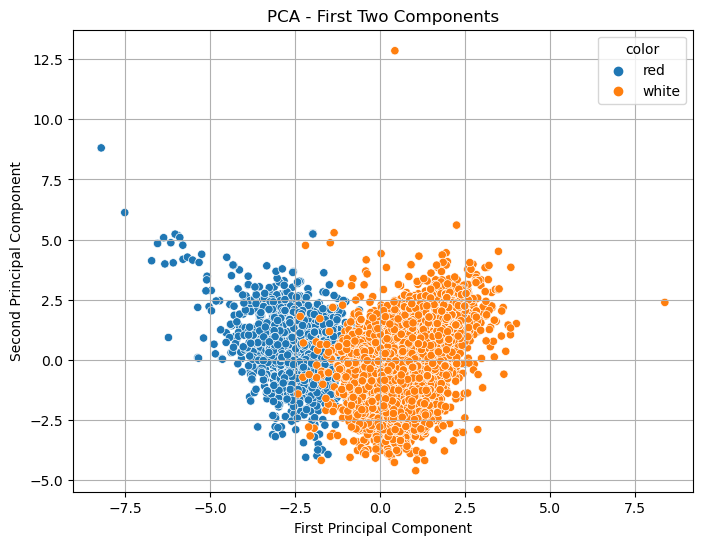

In [ ]:
df_X = df.copy().drop('color', axis = 1)
X = df_X
y = df['color']
your_labels = list(df['color'].unique())

s = scaler()
Xs = s.fit_transform(X)

pca = PCA()
Xpca = pca.fit_transform(Xs)

# plot help from chatGPT
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Xpca[:, 0], y=Xpca[:, 1], hue=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Components')
plt.grid()
plt.show()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
Xt = tsne.fit_transform(Xs)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.016s...
[t-SNE] Computed neighbors for 6497 samples in 1.474s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.781485
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.333885
[t-SNE] KL divergence after 1000 iterations: 1.407236


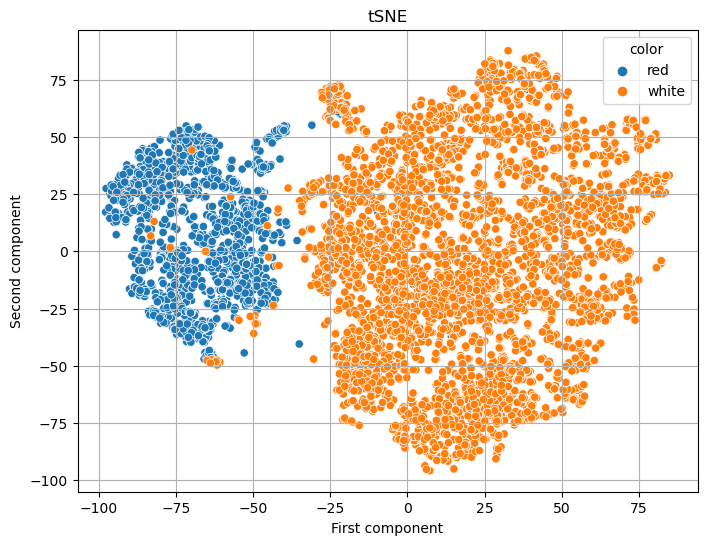

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Xt[:, 0], y=Xt[:, 1], hue=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('tSNE')
plt.grid()
plt.show()